In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../gold.csv', dtype={'Open': np.float64, 'High': np.float64, 'Low': np.float64, 'Close': np.float64, 'Volume': np.int64 })
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5726 non-null   object 
 1   Open      5726 non-null   float64
 2   High      5726 non-null   float64
 3   Low       5726 non-null   float64
 4   Close     5726 non-null   float64
 5   Volume    5726 non-null   int64  
 6   Currency  5726 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 313.3+ KB


,count,mean,std,min,25%,50%,75%,max
Open,5726.0,1037.156911,513.887760,255.0,465.125,1190.25,1364.000,2062.4
High,5726.0,1043.135269,517.643987,255.0,465.600,1197.40,1372.975,2078.8
Low,5726.0,1030.716029,509.609395,255.0,464.400,1182.95,1357.225,2033.6
Close,5726.0,1040.070644,515.370549,255.1,465.300,1193.85,1386.575,2054.6
Volume,5726.0,35568.970311,93121.915705,0.0,20.000,201.00,1389.000,816531.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5726 non-null   datetime64[ns]
 1   Open      5726 non-null   float64       
 2   High      5726 non-null   float64       
 3   Low       5726 non-null   float64       
 4   Close     5726 non-null   float64       
 5   Volume    5726 non-null   int64         
 6   Currency  5726 non-null   object        
 7   Year      5726 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 335.6+ KB


,count,mean,min,25%,50%,75%,max,std
Date,5726,2011-05-06 21:30:37.093957376,2000-01-04 00:00:00,2005-10-04 06:00:00,2011-06-09 12:00:00,2016-12-19 18:00:00,2022-05-18 00:00:00,NaN
Open,5726.0,1037.156911,255.0,465.125,1190.25,1364.0,2062.4,513.88776
High,5726.0,1043.135269,255.0,465.6,1197.4,1372.975,2078.8,517.643987
Low,5726.0,1030.716029,255.0,464.4,1182.95,1357.225,2033.6,509.609395
Close,5726.0,1040.070644,255.1,465.3,1193.85,1386.575,2054.6,515.370549
Volume,5726.0,35568.970311,0.0,20.0,201.0,1389.0,816531.0,93121.915705
Year,5726.0,2010.85138,2000.0,2005.0,2011.0,2016.0,2022.0,6.469418


In [7]:
# Selecting relevant numerical columns for the regression model
X = df[['Open', 'High', 'Low']]
y = df['Close']

In [8]:
test_sizes = [0.3, 0.25, 0.2]
results = {}
all_data = []

In [9]:
for test_size in test_sizes:
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính toán các chỉ số đánh giá
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Lưu kết quả
    results[test_size] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    
    residuals = y_test - y_pred

    all_data.append({
        'test_size': test_size,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'residuals': residuals
    })


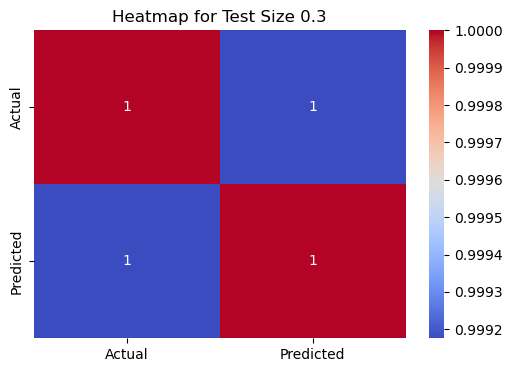

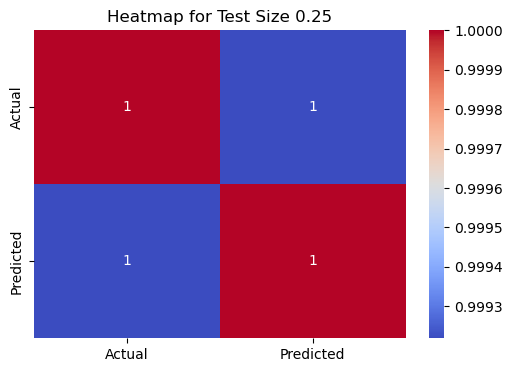

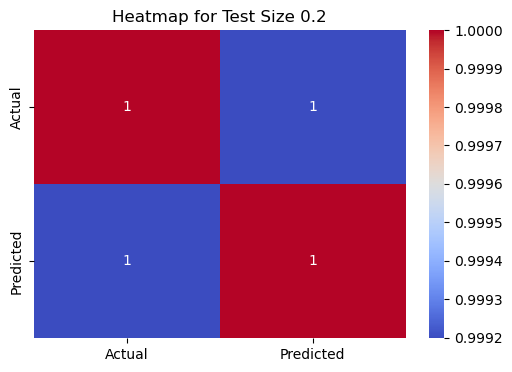

In [10]:
for data in all_data:
    test_size = data['test_size']
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']
    y_pred = data['y_pred']

    # Vẽ heatmap ma trận nhầm lẫn
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).corr(), annot=True, cmap='coolwarm')
    plt.title(f'Heatmap for Test Size {test_size}')
    plt.show()

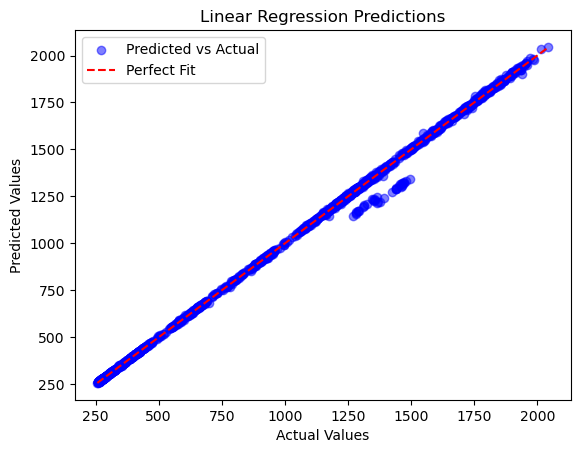

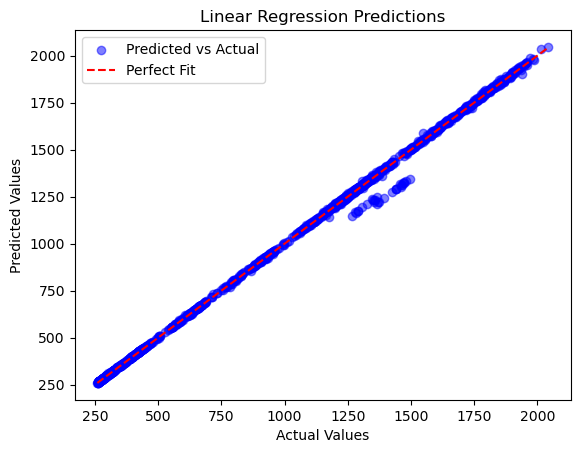

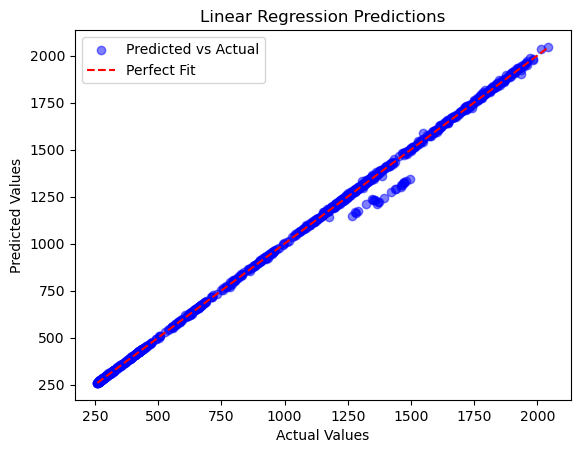

In [11]:
# Scatter plot
for data in all_data:
    y_test = data['y_test']
    y_pred = data['y_pred']
    
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression Predictions')
    plt.legend()
    plt.show()


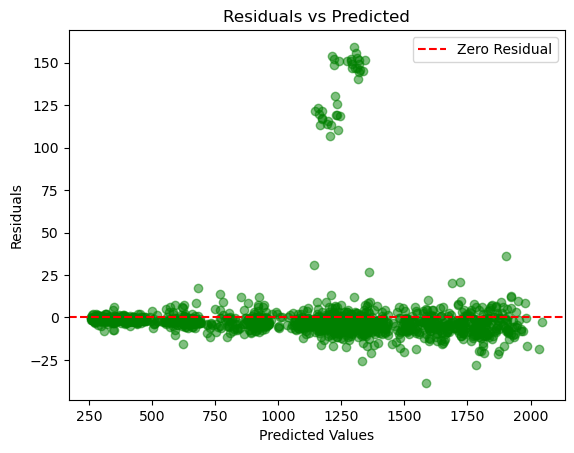

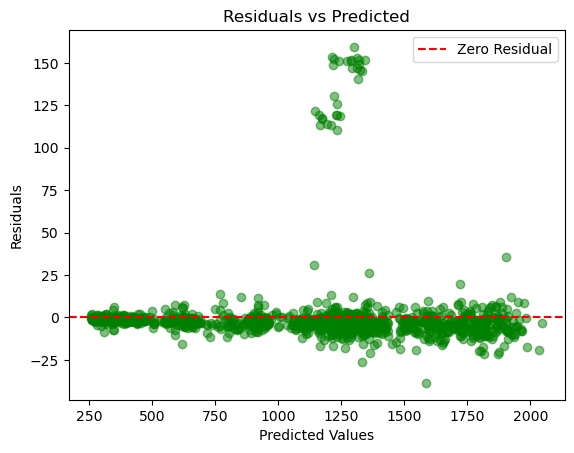

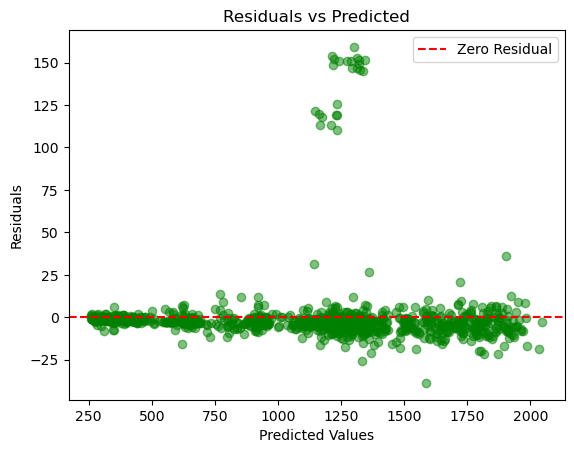

In [12]:
# scatter residuals
for data in all_data:
    y_pred = data['y_pred']
    residuals = data['residuals']

    plt.scatter(y_pred, residuals, alpha=0.5, color='green')
    plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    plt.legend()
    plt.show()


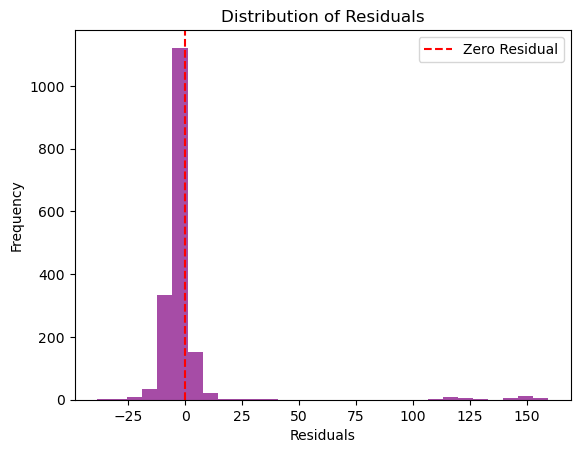

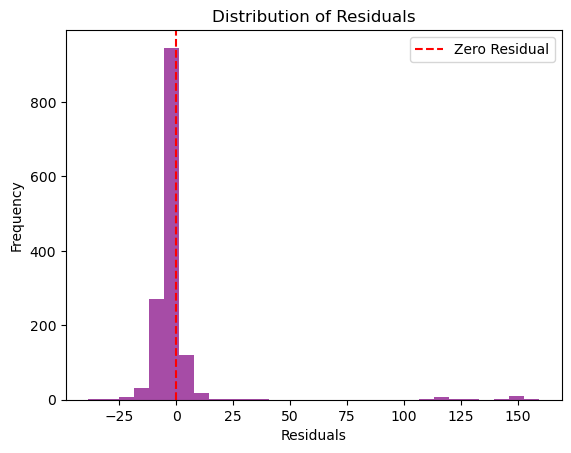

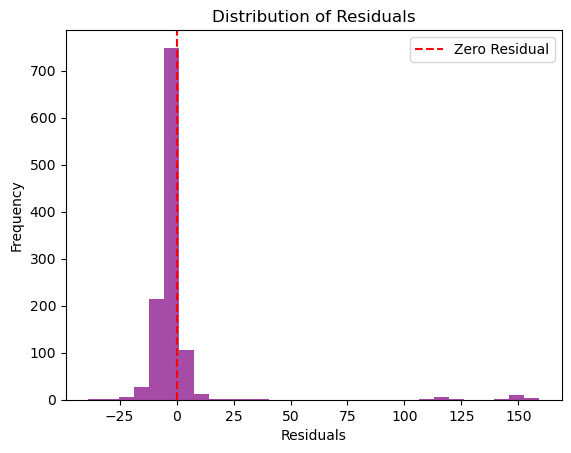

In [13]:
# histogram residuals
for data in all_data:
    residuals = data['residuals']

    plt.hist(residuals, bins=30, color='purple', alpha=0.7)
    plt.axvline(0, color='red', linestyle='--', label='Zero Residual')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.legend()
    plt.show()


In [14]:
print("Evaluation Results:")
for test_size, metrics in results.items():
    print(f"Test Size: {test_size}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MAPE: {metrics['MAPE']}\n")

Evaluation Results:
Test Size: 0.3
RMSE: 21.044856271232486
MAE: 6.948049118943937
MAPE: 0.006234188766234899

Test Size: 0.25
RMSE: 20.622994369533796
MAE: 6.800005545948307
MAPE: 0.0061368798713211875

Test Size: 0.2
RMSE: 20.909856069380314
MAE: 6.873575176644966
MAPE: 0.006150375929373953

